# Dang Thanh Vu - 197796

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


X1 = np.loadtxt('breastMicrocalcifications.dat')
X2 = np.loadtxt('breastNormalTissue.dat')

def scatter(X1, X2, P):
    X = np.concatenate([X1, X2])
    mf0 = np.mean(X, axis=0)
    mf1 = np.mean(X1, axis=0)
    mf2 = np.mean(X2, axis=0)
    Sw = P[0]*np.cov(X1.T) + P[1]*np.cov(X2.T)
    Sb = P[0]*(np.array([mf1 - mf0]).T @ np.array([mf1 - mf0])) + P[1]*(np.array([mf2 - mf0]).T @ np.array([mf2 - mf0]))
    J3 = np.trace(np.linalg.inv(Sw) @ (Sb + Sw))/X1.shape[1]
    return J3

J3 =  1.3978861535861704


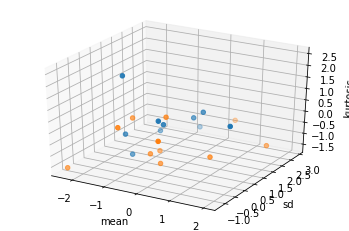

In [2]:
X = np.concatenate([X1, X2])
m0 = np.mean(X, axis=0)
var = np.var(X, axis=0)
Xn = (X - m0)/(np.sqrt(var))


Xf1 = Xn[:10,[0,1,3]]
Xf2 = Xn[10:,[0,1,3]]
J3 = scatter(Xf1, Xf2, np.array([10/21, 11/21]))
print("J3 = ", J3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xf1[:,0], Xf1[:,1], Xf1[:,2], 'r+')
ax.scatter(Xf2[:,0], Xf2[:,1], Xf2[:,2], 'bo')
ax.set_xlabel("mean")
ax.set_ylabel("sd")
ax.set_zlabel("kurtosis")
plt.show()